<a href="https://colab.research.google.com/github/sanchitkalra/udacity-intro-to-tf/blob/main/Udacity_Course_ML_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
cel = np.array([-40, -10,  0,  8, 15, 22,  38], dtype=float)
far = np.array([-40,  14, 32, 46, 59, 72, 100], dtype=float)

for i, c in enumerate(cel):
  print("{} degree C = {} degree F".format(c, far[i]))

-40.0 degree C = -40.0 degree F
-10.0 degree C = 14.0 degree F
0.0 degree C = 32.0 degree F
8.0 degree C = 46.0 degree F
15.0 degree C = 59.0 degree F
22.0 degree C = 72.0 degree F
38.0 degree C = 100.0 degree F


In [8]:
# this is a layer of our deep neural network
#
# this is the only layer in our network, and since it is supposed to have only
# one output, the units is set to 1, and since the input is a single numerical
# value, the input_shape is [1]
#
# if say, the input feature vector was multi-dim, the shape would need to be
# adjusted acc
#
# since a deep neural network could also have multiple layer, the output shape,
# and the input shape of two adjecent layers should match
l0 = tf.keras.layers.Dense(units = 1, input_shape = [1])

In [10]:
# now we need to assemble the model
# assembling a model => defining the layers of the model sequentially
# in the order they are present
model = tf.keras.Sequential([l0])

In [13]:
# once we have assembled the model, we need to now define the loss function
# and the optimiser
#
# loss func => how far is our predicted value from the true value
# optimiser => a func that ajusts the internal values to reduce loss
model.compile(loss="mean_squared_error",
              optimizer=tf.keras.optimizers.Adam(0.1)) # 0.1 => learning rate

In [14]:
# now once we have all the pieces we need for our model, we will train the
# model. training => fitting the data to an equation with the given loss func
# and the optimiser.
#
# during training, all neurons start with some weights and these weights are
# used to calculate output values and loss, and using these loss values the
# optimiser adjusts the weights of the neurons
#
# epochs = number of iterations this fitting should run
history = model.fit(cel, far, epochs = 500, verbose = False)
print("training over")

training over


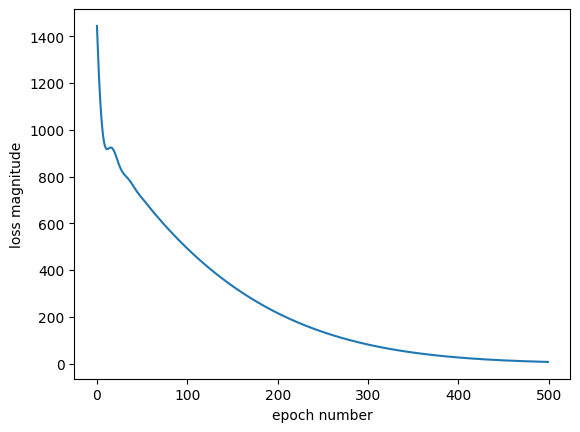

In [16]:
# we shall now use matplotlib to plot a graph of how the loss is going with
# each iteration (specified by epochs)

import matplotlib.pyplot as plt

plt.xlabel("epoch number")
plt.ylabel("loss magnitude")
plt.plot(history.history['loss'])

In [17]:
# we can now also use this model to predict new values from our trained model

print(model.predict([100.0]))

1/1 [==============================] - 0s 173ms/step
[[211.33728]]


In [19]:
# we can also see the weights for each neuron like this
# each neuron has two weights associated with it
# 1. the normal weight (think of it like the slope of the line or m in y=mx + c)
# 2. the bias (this adjusts the mx value by a constant amt, kind of like the c)
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8206127]], dtype=float32), array([29.276022], dtype=float32)]


In [30]:
# technically there's nothing stopping us from making a much more complex
# network with many more layers like this one
#
# input layer, we have defined the input shape as a single numerical val and
# there are 4 neurons in this layer
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
#
# another layer with 4 neurons
l1 = tf.keras.layers.Dense(units=4)
#
# the following is also fine, because the input shape is being set to 4, which
# is the output shape of the last layer
# l1 = tf.keras.layers.Dense(units=4, input_shape=[4])
#
# last layer, the output layer with just one neuron
# technically we could define the input shape of this layer too, but it really
# isn't needed
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(cel, far , epochs=500, verbose=False)
print("Finished training the model")
op1_shape = l0.output_shape
print("output shape of 1st (input layer) => ", op1_shape)
op2_shape = l1.output_shape
print("output shape of 2nd (hidden layer) => ", op2_shape)
op3_shape = l2.output_shape
print("output shape of 3rd (output layer) => ", op3_shape)
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
output shape of 1st (input layer) =>  (None, 4)
output shape of 2nd (hidden layer) =>  (None, 4)
output shape of 3rd (output layer) =>  (None, 1)
1/1 [==============================] - 0s 70ms/step
[[211.74744]]
1/1 [==============================] - 0s 37ms/step
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the l0 variables: [array([[-0.12279951, -0.71298814,  0.07451283, -0.20065549]],
      dtype=float32), array([ 2.3681884, -3.1513264,  2.5663774, -2.3663888], dtype=float32)]
These are the l1 variables: [array([[ 0.8110434 , -1.1034819 , -0.46280494,  0.05344966],
       [ 0.05866814,  0.57438356,  0.8839144 , -0.5212359 ],
       [ 0.674126  ,  0.05298181, -0.56780887,  0.9243766 ],
       [ 0.8438572 ,  0.36958393,  0.5409485 , -0.4296451 ]],
      dtype=float32), array([-0.23412481, -3.0060267 , -3.0289989 ,  2.8761995 ], dtype=float32)]
These are the l2 variables: [array([[ 0.094965 ],
       [-1.0093066],
   